In [2]:
import numpy as np
from PIL import Image
Image
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
example_image = np.asarray(Image.open("/home/kaynar/lisa_full/00/image.008757.jp2"))

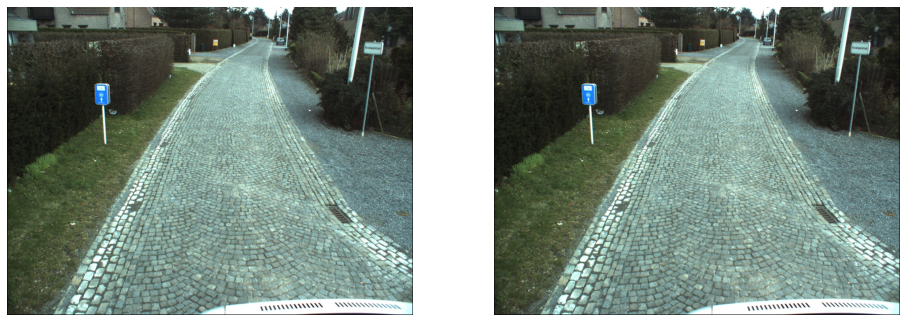

In [4]:
fig = plt.figure(figsize=(16,16))
fig.add_subplot(1,2,1)
plt.imshow(example_image)
plt.axis("off")
fig.add_subplot(1,2,2)
plt.imshow(example_image,cmap="gray")
plt.axis("off")

plt.show()

In [5]:
df = pd.read_csv('BelgiumTSD_annotations/BTSD_training_GTclear.txt', sep=";", header=None)
df.columns = ["filename", "x1", "y1", "x2", "y2", "classID", "a", "b"]
del df["a"]
del df["b"]

In [6]:
df

,filename,x1,y1,x2,y2,classID
0,01/image.000935.jp2,1346.82,246.76,1582.12,484.41,65
1,01/image.000936.jp2,1164.88,237.94,1324.29,397.35,65
2,01/image.000937.jp2,1077.29,232.49,1196.90,352.10,65
3,05/image.000938.jp2,1346.21,387.23,1427.79,468.53,-1
4,05/image.000939.jp2,1466.10,397.68,1566.10,498.02,-1
...,...,...,...,...,...,...
8846,01/image.006836.jp2,1466.68,334.48,1575.18,368.15,-1
8847,01/image.006835.jp2,1298.04,306.20,1380.20,331.13,-1
8848,02/image.006837.jp2,1367.82,480.12,1564.96,583.39,-1
8849,04/image.006838.jp2,48.74,257.03,209.35,280.61,-1


In [7]:
df["classID"].value_counts()

-1      2040
 65      462
 42      375
 76      371
 80      285
        ... 
 138       3
 66        3
 77        3
 60        2
 132       1
Name: classID, Length: 108, dtype: int64

In [8]:
import os

for index, row in df.iterrows():
    if (row["classID"] == -1):
        if os.path.exists(row["filename"]):
            os.remove(row["filename"])
            print("The file has been deleted successfully")
        else:
            print("The file does not exist!")

The file has been deleted successfully
The file has been deleted successfully
The file has been deleted successfully
The file has been deleted successfully
The file has been deleted successfully
The file has been deleted successfully
The file has been deleted successfully
The file has been deleted successfully
The file has been deleted successfully
The file has been deleted successfully
The file has been deleted successfully
The file has been deleted successfully
The file has been deleted successfully
The file has been deleted successfully
The file has been deleted successfully
The file has been deleted successfully
The file has been deleted successfully
The file has been deleted successfully
The file has been deleted successfully
The file has been deleted successfully
The file has been deleted successfully
The file has been deleted successfully
The file has been deleted successfully
The file does not exist!
The file does not exist!
The file does not exist!
The file has been deleted su

In [9]:
#Remove Background images
df = df[df.classID != -1]

In [65]:
counts = df['classID'].value_counts()

res = df[~df['classID'].isin(counts[counts < 50].index)]

In [66]:
res.value_counts()

filename             x1       y1      x2       y2      classID
07/image.006812.jp2  589.49   267.73  681.16   359.39  80         1
01/image.005627.jp2  1271.02  141.68  1411.22  265.80  31         1
01/image.005586.jp2  1445.99  257.83  1595.36  415.99  118        1
01/image.005587.jp2  1344.74  255.32  1464.82  379.59  118        1
01/image.005588.jp2  1289.09  255.74  1388.25  358.25  118        1
                                                                 ..
05/image.003328.jp2  979.19   431.36  989.89   467.52  200        1
05/image.003329.jp2  912.23   368.87  968.87   426.25  82         1
                     937.86   429.88  947.09   464.20  200        1
05/image.003330.jp2  1176.21  382.69  1270.12  483.70  82         1
00/image.000947.jp2  397.92   238.06  434.13   275.08  80         1
Length: 5463, dtype: int64

In [67]:
res

,filename,x1,y1,x2,y2,classID
0,01/image.000935.jp2,1346.82,246.76,1582.12,484.41,65
1,01/image.000936.jp2,1164.88,237.94,1324.29,397.35,65
2,01/image.000937.jp2,1077.29,232.49,1196.90,352.10,65
6,05/image.000938.jp2,1346.49,471.65,1416.46,538.50,34
7,05/image.000939.jp2,1466.78,500.63,1549.77,581.59,34
...,...,...,...,...,...,...
8825,05/image.006817.jp2,1351.31,329.58,1460.49,403.73,143
8826,05/image.006818.jp2,1486.65,320.04,1625.02,411.47,143
8842,02/image.006834.jp2,145.65,148.71,267.41,316.94,3
8843,01/image.006835.jp2,1299.74,238.21,1374.81,305.63,3


In [68]:
res['classID'].nunique()

35

In [69]:
# Save dataframe as csv file
res.to_csv("annotations_imSize.csv", index=False)

In [10]:
counts = df['classID'].value_counts()

res = df[~df['classID'].isin(counts[counts > 50].index)]

In [12]:
res.value_counts

<bound method DataFrame.value_counts of                  filename       x1      y1       x2      y2  classID
15    01/image.000944.jp2  1508.85  537.94  1575.06  591.40      207
16    01/image.000945.jp2  1065.15  432.27  1110.15  470.54      207
17    01/image.000946.jp2  1241.50  479.25  1295.24  522.19      207
42    07/image.000970.jp2   176.41  143.67   236.82  175.92      193
43    07/image.000969.jp2   371.32  131.23   431.05  161.29      193
...                   ...      ...     ...      ...     ...      ...
8837  01/image.006829.jp2  1079.47  127.40  1171.54  264.51       37
8838  01/image.006830.jp2   983.73  158.94  1046.61  252.73       37
8839  05/image.006831.jp2   948.80  279.90  1045.74  387.21       36
8840  05/image.006832.jp2  1215.32  149.51  1494.20  423.45       36
8841  05/image.006833.jp2  1036.98  240.65  1180.65  394.53       36

[1348 rows x 6 columns]>

In [13]:
for index, row in res.iterrows():
    if os.path.exists(row["filename"]):
        os.remove(row["filename"])
        print("The file has been deleted successfully")
    else:
        print("The file does not exist!")

The file has been deleted successfully
The file has been deleted successfully
The file has been deleted successfully
The file has been deleted successfully
The file has been deleted successfully
The file has been deleted successfully
The file has been deleted successfully
The file has been deleted successfully
The file has been deleted successfully
The file has been deleted successfully
The file has been deleted successfully
The file has been deleted successfully
The file has been deleted successfully
The file has been deleted successfully
The file has been deleted successfully
The file has been deleted successfully
The file has been deleted successfully
The file has been deleted successfully
The file has been deleted successfully
The file has been deleted successfully
The file has been deleted successfully
The file has been deleted successfully
The file has been deleted successfully
The file has been deleted successfully
The file has been deleted successfully
The file has been deleted